<a href="https://colab.research.google.com/github/bomul0417/study/blob/main/NIDS_Project/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# 전처리

In [3]:
dos_lo_url='/content/drive/Othercomputers/My Computer/졸작/dos_lo.csv'
pd.options.display.float_format = '{:.9f}'.format

In [4]:
dos_lo = pd.read_csv(dos_lo_url)

In [5]:
dos_lo

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,srv_count,...,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,label
0,0,19,9,491,0,0,0,0,2,2,...,1.000000000,0.000000000,150,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.050000000,0
1,0,40,9,146,0,0,0,0,13,1,...,0.080000000,0.150000000,255,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000,0
2,0,44,5,0,0,0,0,0,123,6,...,0.050000000,0.070000000,255,0.100000000,0.050000000,0.000000000,1.000000000,1.000000000,0.000000000,1
3,0,22,9,232,8153,0,0,0,5,5,...,1.000000000,0.000000000,30,1.000000000,0.000000000,0.030000000,0.030000000,0.010000000,0.000000000,0
4,0,22,9,199,420,0,0,0,30,32,...,1.000000000,0.000000000,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0,14,9,1032,0,0,0,0,53,53,...,1.000000000,0.000000000,255,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,1
130435,0,49,9,794,333,0,0,0,1,1,...,1.000000000,0.000000000,100,0.720000000,0.060000000,0.010000000,0.010000000,0.000000000,0.000000000,0
130436,0,22,9,317,938,0,0,0,2,11,...,1.000000000,0.000000000,197,1.000000000,0.000000000,0.010000000,0.010000000,0.000000000,0.000000000,0
130437,0,22,9,54540,8314,0,0,2,5,10,...,1.000000000,0.000000000,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000,1


In [6]:
dos_loX = dos_lo.drop(['label'],axis=1)
dos_loX

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,srv_count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0,19,9,491,0,0,0,0,2,2,...,0.000000000,1.000000000,0.000000000,150,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.050000000
1,0,40,9,146,0,0,0,0,13,1,...,0.000000000,0.080000000,0.150000000,255,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000
2,0,44,5,0,0,0,0,0,123,6,...,0.000000000,0.050000000,0.070000000,255,0.100000000,0.050000000,0.000000000,1.000000000,1.000000000,0.000000000
3,0,22,9,232,8153,0,0,0,5,5,...,0.000000000,1.000000000,0.000000000,30,1.000000000,0.000000000,0.030000000,0.030000000,0.010000000,0.000000000
4,0,22,9,199,420,0,0,0,30,32,...,0.000000000,1.000000000,0.000000000,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0,14,9,1032,0,0,0,0,53,53,...,0.000000000,1.000000000,0.000000000,255,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000
130435,0,49,9,794,333,0,0,0,1,1,...,0.000000000,1.000000000,0.000000000,100,0.720000000,0.060000000,0.010000000,0.010000000,0.000000000,0.000000000
130436,0,22,9,317,938,0,0,0,2,11,...,0.000000000,1.000000000,0.000000000,197,1.000000000,0.000000000,0.010000000,0.010000000,0.000000000,0.000000000
130437,0,22,9,54540,8314,0,0,2,5,10,...,0.000000000,1.000000000,0.000000000,255,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000


In [7]:
dosY = dos_lo['label']
#dosY= pd.DataFrame(dosY)
dosY

0         0
1         0
2         1
3         0
4         0
         ..
130434    1
130435    0
130436    0
130437    1
130438    0
Name: label, Length: 130439, dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.9f}'.format
#pd.reset_option('display.float_format')
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(dos_loX)

dosX = pd.DataFrame(np_scaled, columns = dos_loX.columns)

dosX

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,srv_count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0.000000000,0.296875000,0.900000000,0.000005481,0.000000000,0.000000000,0.000000000,0.000000000,0.003913894,0.003913894,...,0.000000000,1.000000000,0.000000000,0.588235294,0.170000000,0.030000000,0.170000000,0.000000000,0.000000000,0.050000000
1,0.000000000,0.625000000,0.900000000,0.000001630,0.000000000,0.000000000,0.000000000,0.000000000,0.025440313,0.001956947,...,0.000000000,0.080000000,0.150000000,1.000000000,0.000000000,0.600000000,0.880000000,0.000000000,0.000000000,0.000000000
2,0.000000000,0.687500000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.240704501,0.011741683,...,0.000000000,0.050000000,0.070000000,1.000000000,0.100000000,0.050000000,0.000000000,1.000000000,1.000000000,0.000000000
3,0.000000000,0.343750000,0.900000000,0.000002590,0.001159966,0.000000000,0.000000000,0.000000000,0.009784736,0.009784736,...,0.000000000,1.000000000,0.000000000,0.117647059,1.000000000,0.000000000,0.030000000,0.030000000,0.010000000,0.000000000
4,0.000000000,0.343750000,0.900000000,0.000002221,0.000059755,0.000000000,0.000000000,0.000000000,0.058708415,0.062622309,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0.000000000,0.218750000,0.900000000,0.000011520,0.000000000,0.000000000,0.000000000,0.000000000,0.103718200,0.103718200,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000
130435,0.000000000,0.765625000,0.900000000,0.000008863,0.000047378,0.000000000,0.000000000,0.000000000,0.001956947,0.001956947,...,0.000000000,1.000000000,0.000000000,0.392156863,0.720000000,0.060000000,0.010000000,0.010000000,0.000000000,0.000000000
130436,0.000000000,0.343750000,0.900000000,0.000003539,0.000133454,0.000000000,0.000000000,0.000000000,0.003913894,0.021526419,...,0.000000000,1.000000000,0.000000000,0.772549020,1.000000000,0.000000000,0.010000000,0.010000000,0.000000000,0.000000000
130437,0.000000000,0.343750000,0.900000000,0.000608831,0.001182873,0.000000000,0.000000000,0.019801980,0.009784736,0.019569472,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.070000000


In [9]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

In [10]:
dfrus_X, dfrus_Y = rus.fit_resample(dosX, dosY)
dfrus_X = pd.DataFrame(dfrus_X, columns=dosX.columns)

In [11]:
dfrus_X

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,srv_count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
0,0.000000000,0.171875000,0.900000000,0.000000402,0.000000000,0.000000000,0.000000000,0.000000000,0.021526419,0.021526419,...,0.000000000,1.000000000,0.000000000,0.349019608,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000
1,0.000000000,0.343750000,0.900000000,0.000003572,0.001982172,0.000000000,0.000000000,0.000000000,0.007827789,0.033268102,...,0.000000000,1.000000000,0.000000000,0.768627451,1.000000000,0.000000000,0.010000000,0.010000000,0.000000000,0.000000000
2,0.000000000,0.343750000,0.900000000,0.000003304,0.002351802,0.000000000,0.000000000,0.000000000,0.039138943,0.039138943,...,0.000000000,1.000000000,0.000000000,0.188235294,1.000000000,0.000000000,0.020000000,0.000000000,0.000000000,0.000000000
3,0.000000000,0.265625000,0.900000000,0.000000089,0.000019776,0.000000000,0.000000000,0.000000000,0.001956947,0.001956947,...,0.000000000,1.000000000,0.000000000,1.000000000,0.060000000,0.020000000,0.000000000,0.000000000,0.070000000,0.000000000
4,0.000000000,0.171875000,0.900000000,0.000000491,0.000011097,0.000000000,0.000000000,0.000000000,0.410958904,0.410958904,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.010000000,0.000000000,0.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106765,0.000000000,0.687500000,0.100000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.459882583,0.019569472,...,1.000000000,0.040000000,0.060000000,1.000000000,0.040000000,0.070000000,0.000000000,0.000000000,0.000000000,1.000000000
106766,0.000000000,0.390625000,0.100000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.248532290,0.035225049,...,1.000000000,0.140000000,0.060000000,1.000000000,0.070000000,0.050000000,0.000000000,0.000000000,0.000000000,1.000000000
106767,0.000018365,0.765625000,0.900000000,0.000029013,0.000041687,0.000000000,0.000000000,0.000000000,0.003913894,0.003913894,...,0.000000000,1.000000000,0.000000000,1.000000000,0.730000000,0.130000000,0.000000000,0.000000000,0.000000000,0.260000000
106768,0.000000000,0.218750000,0.900000000,0.000011520,0.000000000,0.000000000,0.000000000,0.000000000,0.103718200,0.103718200,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000


In [12]:
dfrus_Y

0         0
1         0
2         0
3         0
4         0
         ..
106765    1
106766    1
106767    1
106768    1
106769    1
Name: label, Length: 106770, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfrus_X, dfrus_Y, test_size=0.2, random_state=2022)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(85416, 22) (85416,)
(21354, 22) (21354,)


In [14]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [15]:
X_train

array([[0.      , 0.078125, 0.5     , ..., 1.      , 1.      , 0.      ],
       [0.      , 0.6875  , 0.5     , ..., 1.      , 1.      , 0.      ],
       [0.      , 0.171875, 0.9     , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.34375 , 0.9     , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.34375 , 0.9     , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.890625, 0.9     , ..., 0.      , 0.      , 0.      ]])

In [16]:
X_test

array([[0.00000000e+00, 5.78125000e-01, 5.00000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.95858662e-04, 2.81250000e-01, 9.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.43750000e-01, 9.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.25000000e-01, 2.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 8.59375000e-01, 5.00000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.09375000e-01, 5.00000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [17]:
y_train

array([1, 1, 0, ..., 0, 0, 1])

In [18]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(85416, 22) (85416,)
(21354, 22) (21354,)


In [20]:
X_train_t = X_train.reshape(X_train.shape[0], 22, 1)
X_test_t = X_test.reshape(X_test.shape[0], 22, 1)
print(X_train_t.shape)
print(X_train_t)
print(y_test)

(85416, 22, 1)
[[[0.      ]
  [0.078125]
  [0.5     ]
  ...
  [1.      ]
  [1.      ]
  [0.      ]]

 [[0.      ]
  [0.6875  ]
  [0.5     ]
  ...
  [1.      ]
  [1.      ]
  [0.      ]]

 [[0.      ]
  [0.171875]
  [0.9     ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 ...

 [[0.      ]
  [0.34375 ]
  [0.9     ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.34375 ]
  [0.9     ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.890625]
  [0.9     ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]]
[1 0 0 ... 1 1 1]


# LSTM

In [52]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()
model = Sequential() 
model.add(LSTM(2, input_shape=(22, 1), activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2)                 32        
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [53]:
mod=model.fit(X_train_t, y_train, epochs=100, batch_size=64)

Epoch 1/100
1335/1335 [==============================] - 13s 9ms/step - loss: 0.5158 - accuracy: 0.7155
Epoch 2/100
1335/1335 [==============================] - 12s 9ms/step - loss: 0.4039 - accuracy: 0.8521
Epoch 3/100
1335/1335 [==============================] - 13s 9ms/step - loss: 0.3841 - accuracy: 0.8549
Epoch 4/100
1335/1335 [==============================] - 12s 9ms/step - loss: 0.3707 - accuracy: 0.8530
Epoch 5/100
1335/1335 [==============================] - 12s 9ms/step - loss: 0.3336 - accuracy: 0.8521
Epoch 6/100
1335/1335 [==============================] - 12s 9ms/step - loss: 0.2787 - accuracy: 0.8791
Epoch 7/100
1335/1335 [==============================] - 12s 9ms/step - loss: 0.2459 - accuracy: 0.9241
Epoch 8/100
1335/1335 [==============================] - 13s 10ms/step - loss: 0.2331 - accuracy: 0.9304
Epoch 9/100
1335/1335 [==============================] - 12s 9ms/step - loss: 0.2278 - accuracy: 0.9294
Epoch 10/100
1335/1335 [==============================] - 12s 9

## 테스트셋 정확도 

In [60]:
model.predict(X_test_t)

array([[0.9999557 ],
       [0.62692827],
       [0.02812767],
       ...,
       [0.8027351 ],
       [0.9999885 ],
       [0.99996233]], dtype=float32)

In [61]:
scores = model.evaluate(X_test_t, y_test)

668/668 [==============================] - 5s 6ms/step - loss: 0.1400 - accuracy: 0.9538


## 모델 저장

In [62]:
from keras.models import load_model
model.save('/content/drive/Othercomputers/My Computer/졸작/DoS_LSTM.h5')

# Sequential

In [38]:
model = Sequential()
model.add(Dense(2, input_dim=22, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, y_train, epochs=100, batch_size=24)

In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

890/890 [==============================] - 2s 2ms/step - loss: 6.0079e-08 - accuracy: 0.4960
## evaluation loss and_metrics ##
[6.007916653061329e-08, 0.49601948261260986]


# 랜덤포레스트

In [ ]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=5)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))

훈련세트 정확도: 0.991
테스트세트 정확도: 0.990


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10588     4]
 [  200 10562]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10592
           1       1.00      0.98      0.99     10762

    accuracy                           0.99     21354
   macro avg       0.99      0.99      0.99     21354
weighted avg       0.99      0.99      0.99     21354



Feature importances:
[0.002 0.017 0.197 0.041 0.111 0.    0.009 0.009 0.096 0.024 0.034 0.041
 0.005 0.131 0.108 0.02  0.019 0.02  0.023 0.013 0.051 0.028]
duration : 0.002
service : 0.017
flag : 0.197
src_bytes : 0.041
dst_bytes : 0.111
land : 0.000
wrong_fragment : 0.009
hot : 0.009
count : 0.096
srv_count : 0.024
serror_rate : 0.034
srv_serror_rate : 0.041
rerror_rate : 0.005
same_srv_rate : 0.131
diff_srv_rate : 0.108
dst_host_count : 0.020
dst_host_same_srv_rate : 0.019
dst_host_diff_srv_rate : 0.020
dst_host_same_src_port_rate : 0.023
dst_host_serror_rate : 0.013
dst_host_srv_serror_rate : 0.051
dst_host_rerror_rate : 0.028


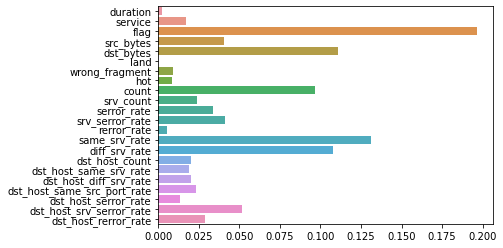

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 
print("Feature importances:\n{0}".format(np.round(rand_clf.feature_importances_, 3)))

for name, value in zip(X_test.columns , rand_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
 
sns.barplot(x=rand_clf.feature_importances_ , y=X_test.columns)

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear', C=1)
model=svc.fit(X_train,y_train)
scoreTrain=model.score(X_train,y_train)
scoreTest=model.score(X_test,y_test)
print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format('1',scoreTrain, scoreTest))

선형 SVM : C:1, training score:0.968343, test score:0.967781


In [ ]:
prediction=model.predict(X_test)
pred=pd.DataFrame(prediction)
pred

,0
0,1
1,0
2,0
3,1
4,1
...,...
21349,0
21350,0
21351,1
21352,1


## SVM(Linear)

In [ ]:
from sklearn import svm

In [ ]:
for cx in range(1,10):
  clf = svm.LinearSVC(C=cx, max_iter=10000000)
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  print('C: {}, Score: {:2f}'.format(cx,score))

C: 1, Score: 0.965463
C: 2, Score: 0.965522
C: 3, Score: 0.965522
C: 4, Score: 0.965545
C: 5, Score: 0.965545
C: 6, Score: 0.965545
C: 7, Score: 0.965557
C: 8, Score: 0.965557
C: 9, Score: 0.965557


In [ ]:
for gam in range(1,10):
  #clf = SVC(kernel='rbf', C=7, max_iter=1000, gamma=gam)
  clf = SVC(kernel='rbf', C=7, gamma=gam)
  clf.fit(X_train, y_train)
  score = clf.score(X_train, y_train)
  print('gam: {}, Score: {:2f}'.format(gam,score))

gam: 1, Score: 0.997342
gam: 2, Score: 0.998150
gam: 3, Score: 0.998373
gam: 4, Score: 0.998455
gam: 5, Score: 0.998478
gam: 6, Score: 0.998560
gam: 7, Score: 0.998560
gam: 8, Score: 0.998583
gam: 9, Score: 0.998595


In [ ]:
clf = svm.LinearSVC(C=7, max_iter=10000000)
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print('Score: {:2f}'.format(score))

Score: 0.965557


In [22]:
X_test

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,srv_count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
90853,0.000000000,0.578125000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.230919765,0.031311155,...,0.000000000,0.140000000,0.070000000,1.000000000,0.000000000,0.070000000,0.000000000,1.000000000,1.000000000,0.000000000
47376,0.000000000,0.343750000,0.900000000,0.000003583,0.000226359,0.000000000,0.000000000,0.000000000,0.005870841,0.005870841,...,0.000000000,1.000000000,0.000000000,0.211764706,1.000000000,0.000000000,0.020000000,0.020000000,0.000000000,0.000000000
51051,0.000532589,0.171875000,0.900000000,0.000000301,0.000003841,0.000000000,0.000000000,0.000000000,0.001956947,0.005870841,...,0.000000000,1.000000000,0.000000000,0.015686275,0.500000000,0.500000000,0.250000000,0.000000000,0.000000000,0.000000000
75378,0.000000000,0.218750000,0.900000000,0.000011520,0.000000000,0.000000000,0.000000000,0.000000000,0.970645793,0.970645793,...,0.000000000,1.000000000,0.000000000,1.000000000,0.670000000,0.020000000,0.670000000,0.000000000,0.000000000,0.250000000
94931,0.000000000,0.687500000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.240704501,0.023483366,...,0.000000000,0.100000000,0.060000000,1.000000000,0.050000000,0.050000000,0.000000000,1.000000000,1.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18379,0.000000000,0.343750000,0.900000000,0.000003505,0.000325667,0.000000000,0.000000000,0.000000000,0.031311155,0.074363992,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.050000000
49598,0.000000000,0.765625000,0.900000000,0.000000000,0.000012093,0.000000000,0.000000000,0.000000000,0.001956947,0.001956947,...,0.000000000,1.000000000,0.000000000,0.207843137,0.870000000,0.060000000,0.020000000,0.000000000,0.000000000,0.000000000
99777,0.000000000,0.125000000,0.200000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.479452055,0.005870841,...,1.000000000,0.010000000,0.060000000,1.000000000,0.010000000,0.070000000,0.000000000,0.000000000,0.000000000,1.000000000
75278,0.000000000,0.859375000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.138943249,0.035225049,...,0.000000000,0.250000000,0.060000000,1.000000000,0.250000000,0.020000000,0.000000000,1.000000000,1.000000000,0.000000000


In [23]:
X_train

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,count,srv_count,...,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate
75225,0.000000000,0.078125000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.252446184,0.013698630,...,0.000000000,0.050000000,0.060000000,1.000000000,0.050000000,0.070000000,0.000000000,1.000000000,1.000000000,0.000000000
80659,0.000000000,0.687500000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.483365949,0.015655577,...,0.000000000,0.030000000,0.060000000,1.000000000,0.040000000,0.070000000,0.000000000,1.000000000,1.000000000,0.000000000
19607,0.000000000,0.171875000,0.900000000,0.000000480,0.000011382,0.000000000,0.000000000,0.000000000,0.219178082,0.219178082,...,0.000000000,1.000000000,0.000000000,1.000000000,1.000000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000
70716,0.000000000,0.687500000,0.900000000,0.000000313,0.000000000,0.000000000,1.000000000,0.000000000,0.099804305,0.097847358,...,0.020000000,0.980000000,0.040000000,1.000000000,0.200000000,0.020000000,0.200000000,0.000000000,0.000000000,0.600000000
94939,0.000000000,0.437500000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.430528376,0.003913894,...,0.000000000,0.010000000,0.060000000,1.000000000,0.010000000,0.060000000,0.000000000,1.000000000,1.000000000,0.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46769,0.000000000,0.343750000,0.900000000,0.000002456,0.000176563,0.000000000,0.000000000,0.000000000,0.027397260,0.027397260,...,0.000000000,1.000000000,0.000000000,0.054901961,1.000000000,0.000000000,0.070000000,0.000000000,0.000000000,0.000000000
103024,0.000000000,0.687500000,0.100000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.491193738,0.007827789,...,1.000000000,0.020000000,0.060000000,1.000000000,0.020000000,0.060000000,0.000000000,0.000000000,0.000000000,1.000000000
16557,0.000000000,0.343750000,0.500000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.003913894,0.003913894,...,0.000000000,1.000000000,0.000000000,0.019607843,1.000000000,0.000000000,0.400000000,0.200000000,0.000000000,0.000000000
1244,0.000000000,0.156250000,0.900000000,0.000000536,0.000006829,0.000000000,0.000000000,0.000000000,0.154598826,0.001956947,...,0.000000000,0.010000000,0.030000000,1.000000000,0.000000000,0.010000000,0.000000000,0.000000000,0.000000000,0.000000000


In [24]:
y_train

75225     1
80659     1
19607     0
70716     1
94939     1
         ..
46769     0
103024    1
16557     0
1244      0
86909     1
Name: label, Length: 85416, dtype: int64

In [25]:
y_test

90853     1
47376     0
51051     0
75378     1
94931     1
         ..
18379     0
49598     0
99777     1
75278     1
102805    1
Name: label, Length: 21354, dtype: int64